In [2]:
import numpy as np
import matplotlib.pyplot as plt

from joblib import Parallel, delayed, parallel_backend

import pandas as pd

In [3]:
og_df = pd.read_csv('../out_LED.csv')
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

t_stim_and_led_tuple = [(row['intended_fix'], row['LED_onset_time']) for _, row in df.iterrows()]

ABL_arr = df['ABL'].unique()
ABL_arr.sort()

ILD_arr = df['ILD'].unique()
ILD_arr.sort()

# percentage of LED on trials
frac_of_led = df['LED_trial'].values.sum() / df['LED_trial'].values.size
print(f'frac_of_led: {frac_of_led}')

frac_of_led: 0.33939811074203746


In [4]:
df_led_on = df[ df['LED_trial'] == 1 ]
df_led_off = df[ df['LED_trial'] == 0 ]

In [8]:
positive_ILD_arr = ILD_arr[ILD_arr > 0]
RTs_dict_off = {}
for ABL in ABL_arr:
    RTs_dict_off[ABL] = {}
    for ILD in positive_ILD_arr:
        RTs_dict_off[ABL][ILD] = []

for _, row in df_led_off.iterrows():
    if row['timed_fix'] > row['intended_fix']:
        RTs_dict_off[row['ABL']][np.abs(row['ILD'])].append(row['timed_fix'] - row['intended_fix'])

RTs_dict_on = {}
for ABL in ABL_arr:
    RTs_dict_on[ABL] = {}
    for ILD in positive_ILD_arr:
        RTs_dict_on[ABL][ILD] = []

for _, row in df_led_on.iterrows():
    if row['timed_fix'] > row['intended_fix']:
        RTs_dict_on[row['ABL']][np.abs(row['ILD'])].append(row['timed_fix'] - row['intended_fix'])

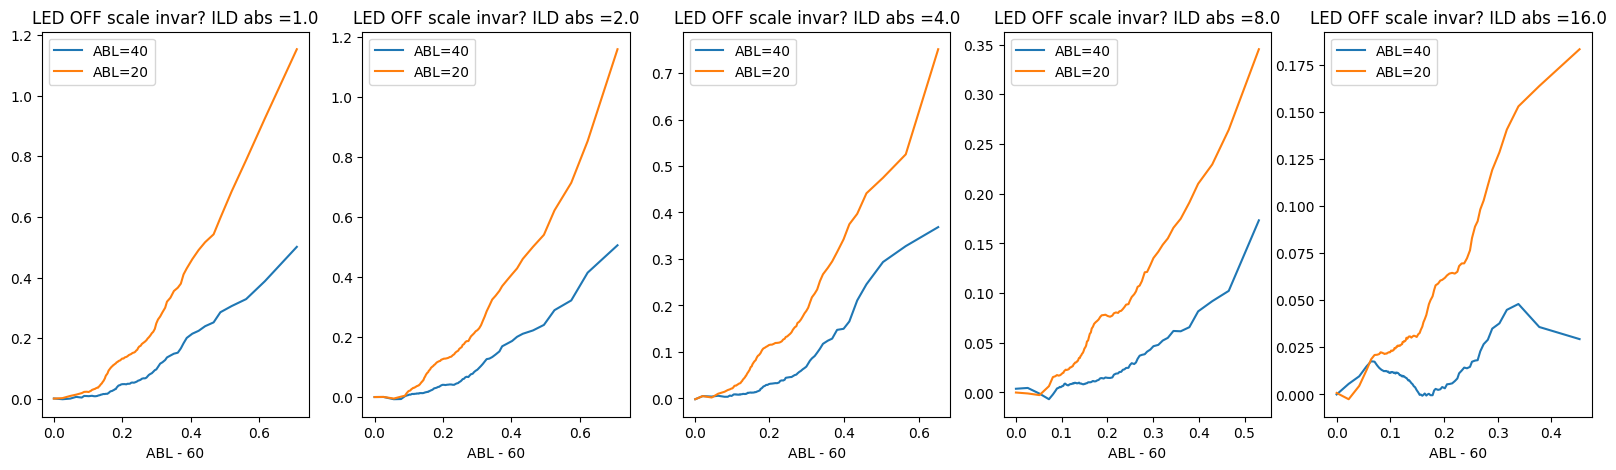

In [15]:
# RTs pos and neg together
f = 1
percentiles = np.arange(0, 100, 1)
plt.figure(figsize=(20, 5))
for p_ILD in positive_ILD_arr:
    RTs_60 =  RTs_dict_off[60][p_ILD]; perc_60 = np.percentile(RTs_60, percentiles)
    RTs_40 = RTs_dict_off[40][p_ILD]; perc_40 = np.percentile(RTs_40, percentiles)
    RTs_20 = RTs_dict_off[20][p_ILD]; perc_20 = np.percentile(RTs_20, percentiles)

    perc_diff_40_60 = perc_40 - perc_60
    perc_diff_20_60 = perc_20 - perc_60

    plt.subplot(1, len(positive_ILD_arr), f)
    plt.plot(perc_60, perc_diff_40_60, label='ABL=40')
    plt.plot(perc_60, perc_diff_20_60, label='ABL=20')
    plt.xlabel('60 percentile')
    plt.xlabel('ABL - 60')
    plt.title(f'LED OFF scale invar? ILD abs ={p_ILD}')
    plt.legend();
    f += 1


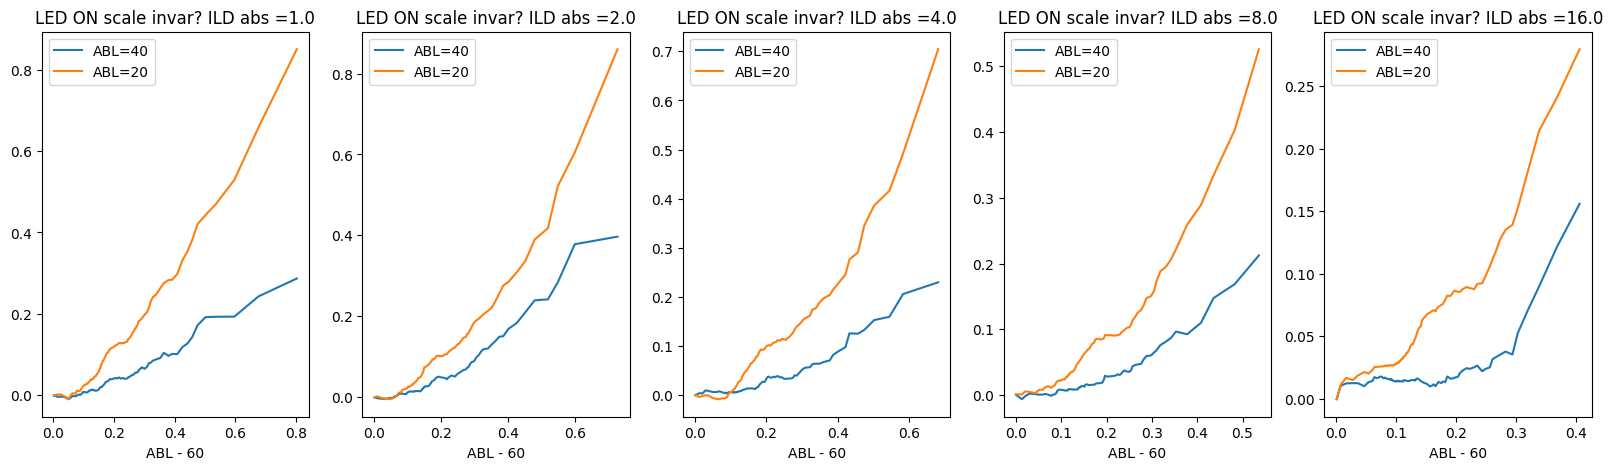

In [16]:
# RTs pos and neg together
f = 1
percentiles = np.arange(0, 100, 1)
plt.figure(figsize=(20, 5))
for p_ILD in positive_ILD_arr:
    RTs_60 =  RTs_dict_on[60][p_ILD]; perc_60 = np.percentile(RTs_60, percentiles)
    RTs_40 = RTs_dict_on[40][p_ILD]; perc_40 = np.percentile(RTs_40, percentiles)
    RTs_20 = RTs_dict_on[20][p_ILD]; perc_20 = np.percentile(RTs_20, percentiles)

    perc_diff_40_60 = perc_40 - perc_60
    perc_diff_20_60 = perc_20 - perc_60

    plt.subplot(1, len(positive_ILD_arr), f)
    plt.plot(perc_60, perc_diff_40_60, label='ABL=40')
    plt.plot(perc_60, perc_diff_20_60, label='ABL=20')
    plt.xlabel('60 percentile')
    plt.xlabel('ABL - 60')
    plt.title(f'LED ON scale invar? ILD abs ={p_ILD}')
    plt.legend();
    f += 1


# led off after on?

In [20]:
timed_led = df_led_on['timed_LED']
led_onset_time = df_led_on['LED_onset_time']

timed_fix = df_led_on['timed_fix']

In [42]:
(timed_led == 1).sum(), (timed_fix == 1).sum()

(np.int64(3), np.int64(16))

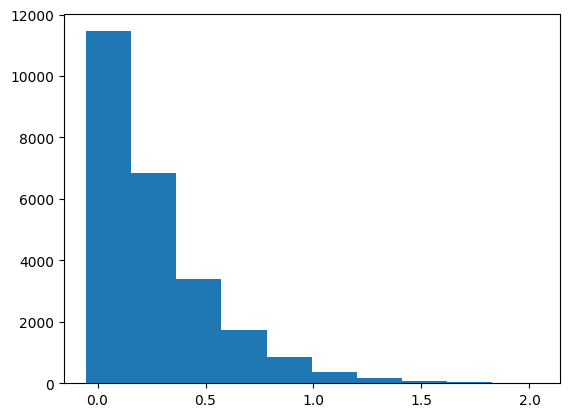

In [ ]:
plt.hist(timed_fix - timed_led);

(-0.5, 1.0)

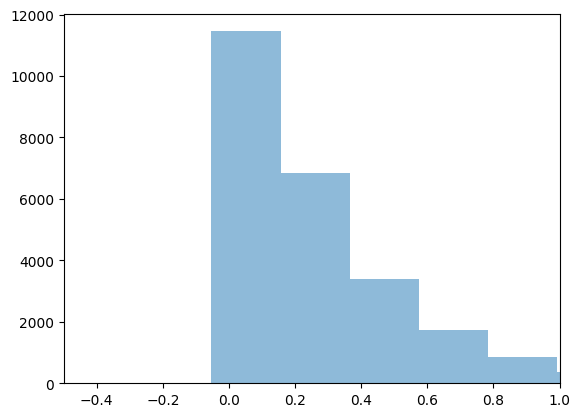

In [ ]:
plt.hist(timed_fix - timed_led, alpha=0.5, label='timed_fix - timed_LED');
plt.xlim(-0.5,1)

In [32]:
((timed_led - led_onset_time ) == 1.).sum()

np.int64(0)

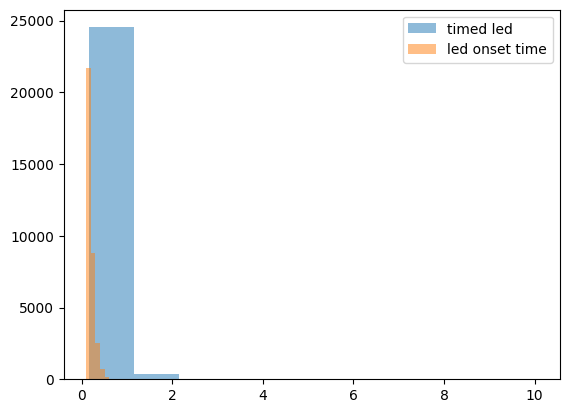

In [35]:
plt.hist(timed_led, label='timed led', alpha=0.5)

plt.hist(led_onset_time, label='led onset time', alpha=0.5)
plt.legend();

(-0.5, 2.0)

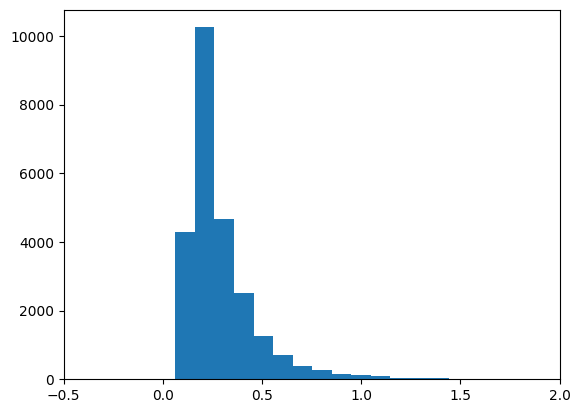

In [33]:
plt.hist(timed_led - led_onset_time, bins=100);
plt.xlim(-0.5,2)

## timed_led?

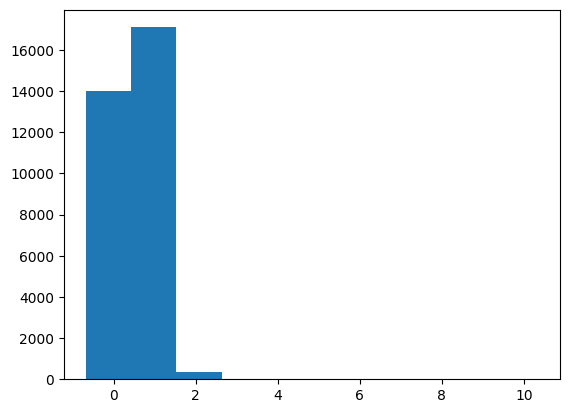

In [60]:
plt.hist(timed_fix - led_onset_time);

In [59]:
(timed_led - led_onset_time > 1.0).sum()

np.int64(334)

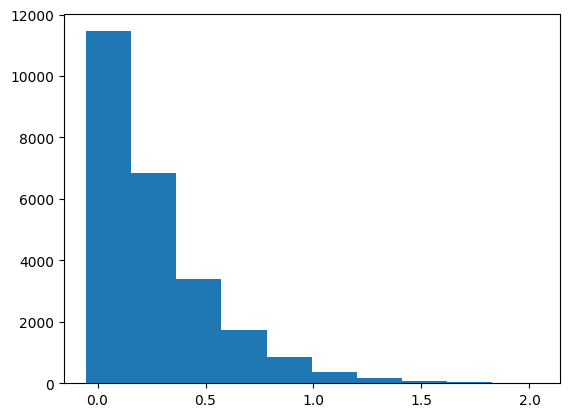

In [50]:
plt.hist(timed_fix - timed_led);

# test other training level

In [86]:
og_df = pd.read_csv('../out_LED.csv')
df_s_1_15 = og_df[ og_df['session'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) ]
print(f'len of df session 1 - 15 = {len(df_s_1_15)}')

df_s_1_15_ON = df_s_1_15[ df_s_1_15['LED_trial'] == 1 ]
print(f'len of df session 1 - 15 LED ON = {len(df_s_1_15_ON)}')

len of df session 1 - 15 = 55972
len of df session 1 - 15 LED ON = 0


In [78]:
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]
df1 = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]
session_type = 7    
df1 = df1[ df1['session_type'].isin([session_type]) ]
training_level = 16
df1 = df1[ df1['training_level'].isin([training_level]) ]

df1 = df1[ df1['session'].isin(np.arange(1,16)) ]

In [80]:
df_s_1_15 = og_df[ og_df['session'].isin(np.arange(1,16)) ]

In [83]:
df_s_1_15_ON = df_s_1_15[ df_s_1_15['LED_trial'] == 1 ]

In [84]:
df_s_1_15_ON

,box,animal,session,session_type,training_level,block,trial,trials_per_block,ABL,min_ITI,...,timed_LED,LED_powerR,LED_powerL,left_amp,right_amp,waveformR,waveformL,response_poke,LED_onset_time,LED_duration


In [74]:
df1_on = df1[ df1['LED_trial'] == 1 ]

In [75]:
len(df1_on)

0